In [1]:
# Kerakli kutubxonalarni import qilish
import numpy as np

In [2]:
# SVM sinflovchi algoritmi uchun yangi class yaratib olish
class SVMClassifier:
    def __init__(self, learning_rate=0.01, regularization_param=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.regularization_param = regularization_param
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Og'irlik va biasni kiritish
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Gradient tushish
        for _ in range(self.num_iterations):
            # Xatolik va gradientni hisoblash
            loss, dw, db = self.compute_gradients(X, y)

            # Og'irlik va biasni yangilash
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        # Og'irlik va bias yordamida bashoratni amalga oshirish
        predictions = np.dot(X, self.weights) + self.bias
        return np.sign(predictions)

    def compute_gradients(self, X, y):
        # Xatolik va gradientni hisoblash
        num_samples = X.shape[0]
        scores = np.dot(X, self.weights) + self.bias
        margins = 1 - y * scores
        loss = np.maximum(0, margins).mean() + 0.5 * self.regularization_param * np.sum(self.weights ** 2)
        grad_weights = np.zeros_like(self.weights)
        grad_bias = 0

        indicator = (margins > 0).astype(int)
        grad_weights += -np.dot(X.T, y * indicator) / num_samples + self.regularization_param * self.weights
        grad_bias += -np.sum(y * indicator) / num_samples

        return loss, grad_weights, grad_bias

In [3]:
# Ma'lumotlarni yaratib olish
np.random.seed(42)
X_train = np.random.rand(100, 2)
y_train = 2 * (X_train.sum(axis=1) > 1) - 1  # Chiziqli qaror chegarasi

# SVM yordamida modelni o'qitish
svm_classifier = SVMClassifier(learning_rate=0.01, regularization_param=0.01, num_iterations=1000)
svm_classifier.fit(X_train, y_train)

In [4]:
# Bashoratlash
X_test = np.random.rand(20, 2)
predictions = svm_classifier.predict(X_test)

In [5]:
# Bashoratni chop etish
print("Predictions:", predictions)

Predictions: [-1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1.  1.  1.  1. -1. -1.
 -1. -1.]


In [6]:
import matplotlib.pyplot as plt

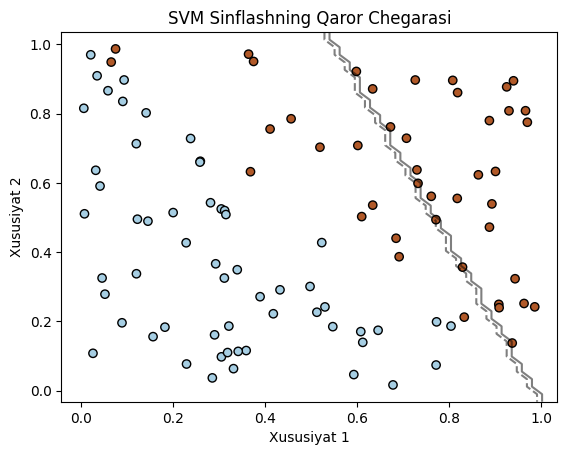

In [7]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, marker='o', edgecolors='k')

    # Plot the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

    # Create grid to evaluate model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
xy = np.c_[xx.ravel(), yy.ravel()]

    # Decision boundary
Z = svm_classifier.predict(xy)
Z = Z.reshape(xx.shape)

    # Plot decision boundary
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.title('SVM Sinflashning Qaror Chegarasi')
plt.xlabel('Xususiyat 1')
plt.ylabel('Xususiyat 2')
plt.show()